# Contents in this notebook

#### 1. Importing Libraries and Datasets

#### 2. Task 4.10 Questions 5 - 10 (Part 1)
         Question 5: Creating profile variables
         Question 6: Creating Visualizations for profile variables
         Question 7: Aggregating the data
         Question 8: Compare customer profiles with regions and departments
         Question 9: Create visualizations for comparison of customer profiles with regions and departments
         Question 10: Clean up script and export dataset
         

# Importing Libaries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Defining Path
path = r'C:\Users\seann\Downloads\Career Foundry Tasks\12-08-22 Instacart Basket Analysis'

In [3]:
# Importing Orders and Products Merged Data Set
instacart_merged_updated = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_merged_updated.pkl'))

In [4]:
# Importing Instacart regular activity customer subset Data Set
regular_activity_sub = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_ regular_activity_sub.pkl'))

## 4.10 Question 5

In [5]:
# Creating babies subset based off of department_id
babies = regular_activity_sub[regular_activity_sub['department_id']==18]

In [6]:
babies.shape

(410392, 39)

In [7]:
# Removing Duplicates
babies = babies.drop_duplicates()

In [8]:
# Creating a list for babies
list_babies = babies['user_id'].unique()

In [9]:
# Checking columns for regular activity sub dataframe
regular_activity_sub.columns

Index(['order_id', 'user_id', 'amount_of_orders_made', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest day',
       'busiest days', 'Busiest Order Periods', 'max_order', 'loyalty_flag',
       'avg_price', 'spending_flag', 'median_days_since_prior_order',
       'frequency_flag', 'add _to_cart_order', 'First Name', 'Surname',
       'Gender', 'State', 'Age', 'date_joined', 'dependants', 'fam_status',
       'income', '_merge', 'region', 'exclusion_flag', 'age_flag',
       'income_flag', 'dependant_flag'],
      dtype='object')

In [10]:
# Creating baby flag
regular_activity_sub.loc[(regular_activity_sub['user_id'].isin(list_babies))&(regular_activity_sub['dependants']>0),'baby_flag']='Young Child'
regular_activity_sub.loc[(regular_activity_sub['department_id']!=18)&(regular_activity_sub['dependants']>0),'baby_flag']='Older Child'
regular_activity_sub.loc[regular_activity_sub['dependants']==0,'baby_flag']='No Child'

In [11]:
regular_activity_sub.head(1)

,order_id,user_id,amount_of_orders_made,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,dependants,fam_status,income,_merge,region,exclusion_flag,age_flag,income_flag,dependant_flag,baby_flag
0,2539329,1,1,2,8,999.0,196,1,0,Soda,...,3,married,40423,both,South,Regular activity customer,Middle Age,middle income,Large Household,Older Child


In [12]:
# Checking value count
regular_activity_sub['baby_flag'].value_counts(dropna = False)

Older Child    22917819
No Child        7739681
Young Child      307064
Name: baby_flag, dtype: int64

## 4.10 Question 6 (Making Visulizations)

<AxesSubplot:>

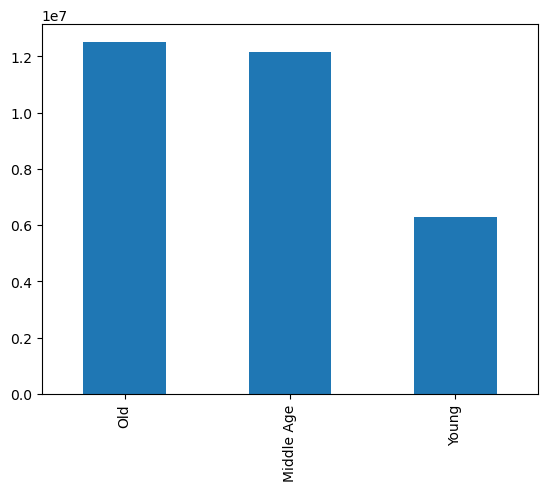

In [13]:
# Bar chart for age group
regular_activity_sub['age_flag'].value_counts().plot.bar()

<AxesSubplot:>

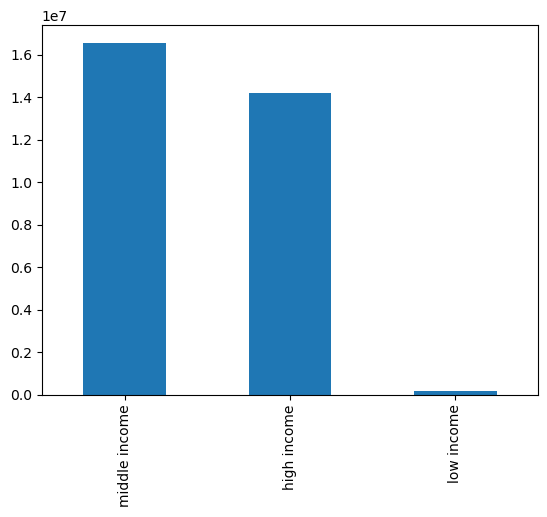

In [14]:
# Bar chart for income
regular_activity_sub['income_flag'].value_counts().plot.bar()

<AxesSubplot:>

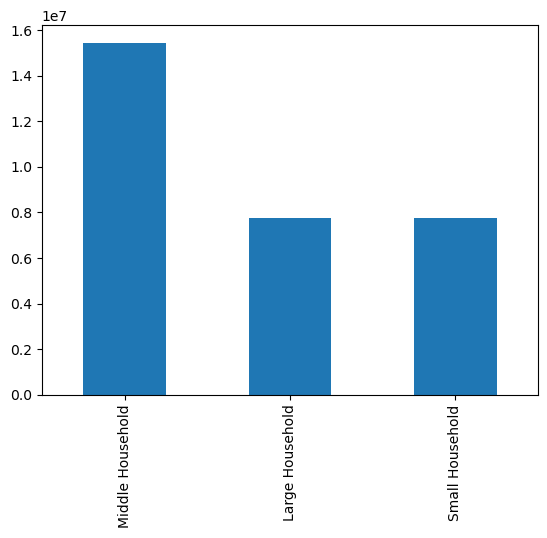

In [15]:
# Bar chart for household size
regular_activity_sub['dependant_flag'].value_counts().plot.bar()

<AxesSubplot:>

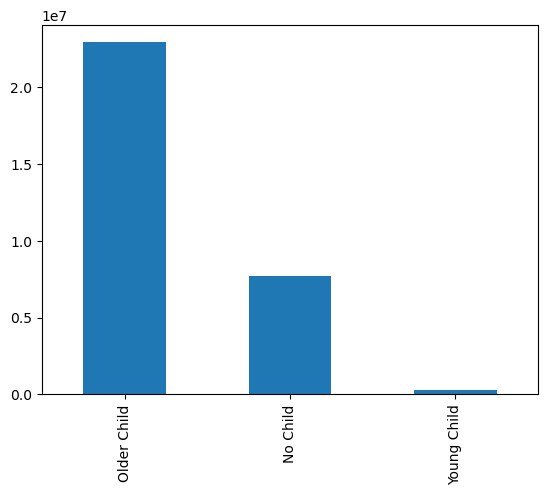

In [16]:
# Bar chart for child age in households
regular_activity_sub['baby_flag'].value_counts().plot.bar()

## 4.10 Question 7 (Aggregating Data)

In [17]:
# Aggregating frequency per age
regular_activity_sub.groupby('age_flag').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order            
                             mean  min    max
age_flag                                     
Middle Age               63.62500  0.0  999.0
Old                      64.00000  0.0  999.0
Young                    63.90625  0.0  999.0

In [18]:
# Aggregating expenditure per age
regular_activity_sub.groupby('age_flag').agg({'prices': ['mean', 'min', 'max']})

prices          
             mean  min  max
age_flag                   
Middle Age    NaN  1.0  inf
Old           NaN  1.0  inf
Young         NaN  1.0  inf

In [19]:
# Aggregating frequency per income
regular_activity_sub.groupby('income_flag').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order            
                                mean  min    max
income_flag                                     
high income                  63.3750  0.0  999.0
low income                   71.5625  0.0  999.0
middle income                64.1250  0.0  999.0

In [20]:
# Aggregating expenditure per income
regular_activity_sub.groupby('income_flag').agg({'prices': ['mean', 'min', 'max']})

prices           
                  mean  min   max
income_flag                      
high income        NaN  1.0   inf
low income     6.53125  1.0  25.0
middle income      NaN  1.0   inf

In [21]:
# Aggregating frequency per household size
regular_activity_sub.groupby('dependant_flag').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order            
                                   mean  min    max
dependant_flag                                     
Large Household                63.59375  0.0  999.0
Middle Household               64.00000  0.0  999.0
Small Household                63.75000  0.0  999.0

In [22]:
# Aggregating expenditure per household size
regular_activity_sub.groupby('dependant_flag').agg({'prices': ['mean', 'min', 'max']})

prices          
                   mean  min  max
dependant_flag                   
Large Household     NaN  1.0  inf
Middle Household    NaN  1.0  inf
Small Household     NaN  1.0  inf

In [23]:
# Aggregating frequency per child age
regular_activity_sub.groupby('baby_flag').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order            
                              mean  min    max
baby_flag                                     
No Child                  63.75000  0.0  999.0
Older Child               63.96875  0.0  999.0
Young Child               54.34375  0.0  999.0

In [24]:
# Aggregating expenditure per child age
regular_activity_sub.groupby('baby_flag').agg({'prices': ['mean', 'min', 'max']})

prices           
                 mean  min   max
baby_flag                       
No Child          NaN  1.0   inf
Older Child       NaN  1.0   inf
Young Child  7.648438  1.0  15.0

## 4.10 Question 8 

In [25]:
# Importing departments dataframe
dept_df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [26]:
dept_df

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [27]:
# Renaming column
dept_df.rename(columns ={'Unnamed: 0': 'department_id'}, inplace = True)

In [28]:
# Creating data dictionary for dataframe
zipped=zip(dept_df['department_id'], dept_df['department'])
data_dict=dict(zipped)
data_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [29]:
regular_activity_sub['department']= regular_activity_sub['department_id'].map(data_dict)

In [30]:
regular_activity_sub.head(5)

,order_id,user_id,amount_of_orders_made,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,fam_status,income,_merge,region,exclusion_flag,age_flag,income_flag,dependant_flag,baby_flag,department
0,2539329,1,1,2,8,999.0,196,1,0,Soda,...,married,40423,both,South,Regular activity customer,Middle Age,middle income,Large Household,Older Child,beverages
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,married,40423,both,South,Regular activity customer,Middle Age,middle income,Large Household,Older Child,beverages
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,married,40423,both,South,Regular activity customer,Middle Age,middle income,Large Household,Older Child,beverages
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,married,40423,both,South,Regular activity customer,Middle Age,middle income,Large Household,Older Child,beverages
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,married,40423,both,South,Regular activity customer,Middle Age,middle income,Large Household,Older Child,beverages


In [31]:
# Creating crosstab between age and region
age_region = pd.crosstab(regular_activity_sub['age_flag'], regular_activity_sub['region'], dropna = False)

In [32]:
age_region

region,Midwest,North_East,South,West
age_flag,,,,
Middle Age,2886186,2119320,3795247,3351273
Old,2914280,2233889,3905171,3454958
Young,1461047,1111476,2001367,1730350


In [41]:
# Creating crosstab between age and department
age_department = pd.crosstab(regular_activity_sub['department'], regular_activity_sub['age_flag'], dropna = False)

In [42]:
age_department

age_flag,Middle Age,Old,Young
department,,,
alcohol,56853,57339,30435
babies,163431,162891,84070
bakery,440918,452315,227595
beverages,1006059,1046601,519241
breakfast,264469,268746,137635
bulk,13037,13454,6960
canned goods,395915,407915,208244
dairy eggs,2036745,2084161,1056276
deli,393923,406158,203753


In [43]:
# Creating crosstab between income and region
income_region = pd.crosstab(regular_activity_sub['income_flag'], regular_activity_sub['region'], dropna = False)

In [44]:
income_region

region,Midwest,North_East,South,West
income_flag,,,,
high income,3400093,2516484,4388131,3902320
low income,53250,33075,62453,45092
middle income,3808170,2915126,5251201,4589169


In [45]:
# Creating crosstab between income and department
income_department = pd.crosstab(regular_activity_sub['department'], regular_activity_sub['income_flag'], dropna = False)

In [46]:
income_department

income_flag,high income,low income,middle income
department,,,
alcohol,69142,1247,74238
babies,196696,1509,212187
bakery,527703,6001,587124
beverages,1126437,23377,1422087
breakfast,297594,4801,368455
bulk,14218,333,18900
canned goods,485226,4190,522658
dairy eggs,2406160,28367,2742655
deli,462089,6501,535244


In [47]:
# Creating crosstab between household size and region
household_region = pd.crosstab(regular_activity_sub['dependant_flag'], regular_activity_sub['region'], dropna = False)

In [48]:
household_region

region,Midwest,North_East,South,West
dependant_flag,,,,
Large Household,1787286,1381233,2444954,2159043
Middle Household,3651411,2728970,4840058,4231928
Small Household,1822816,1354482,2416773,2145610


In [49]:
# Creating crosstab between household and department
household_department = pd.crosstab(regular_activity_sub['department'], regular_activity_sub['dependant_flag'], dropna = False)

In [50]:
household_department

dependant_flag,Large Household,Middle Household,Small Household
department,,,
alcohol,37333,70467,36827
babies,102585,204479,103328
bakery,279822,559611,281395
beverages,640927,1285633,645341
breakfast,167322,337096,166432
bulk,8403,17048,8000
canned goods,255325,505729,251020
dairy eggs,1296264,2586542,1294376
deli,252592,497860,253382


In [51]:
# Creating crosstab between child age and region
child_region = pd.crosstab(regular_activity_sub['baby_flag'], regular_activity_sub['region'], dropna = False)

In [52]:
child_region

region,Midwest,North_East,South,West
baby_flag,,,,
No Child,1822816,1354482,2416773,2145610
Older Child,5367664,4055516,7187850,6306789
Young Child,71033,54687,97162,84182


In [53]:
# Creating crosstab between child age and department
child_department = pd.crosstab(regular_activity_sub['department'], regular_activity_sub['baby_flag'], dropna = False)

In [54]:
child_department

baby_flag,No Child,Older Child,Young Child
department,,,
alcohol,36827,107800,0
babies,103328,0,307064
bakery,281395,839433,0
beverages,645341,1926560,0
breakfast,166432,504418,0
bulk,8000,25451,0
canned goods,251020,761054,0
dairy eggs,1294376,3882806,0
deli,253382,750452,0


## 4.10 Question 9

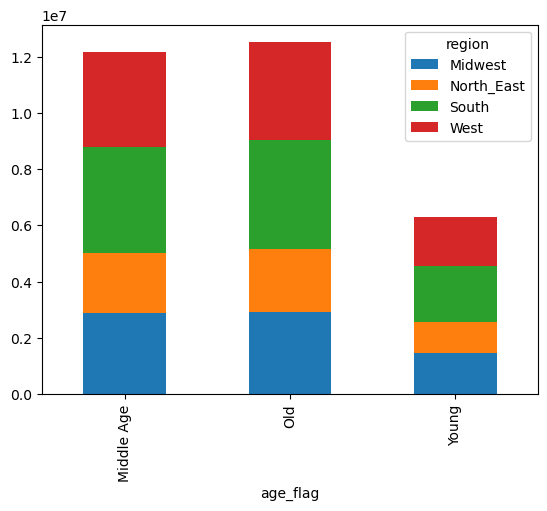

In [55]:
# Bar Chart for age and region
age_region_bar = age_region.plot(kind= 'bar', stacked = True)

In [56]:
# Exporting age_region bar chart
age_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_region_bar.png'))

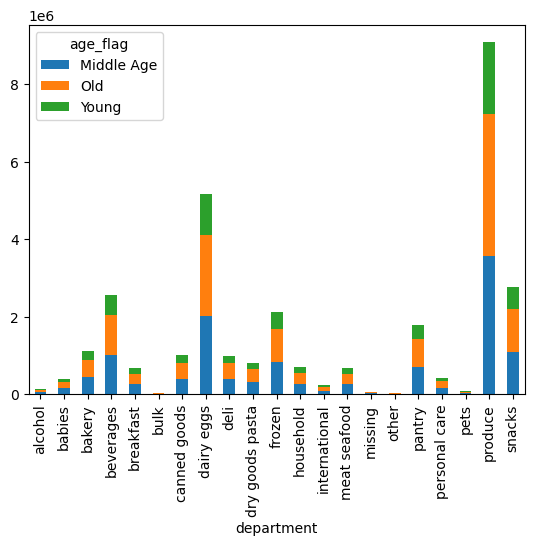

In [57]:
# Bar Chart for age and department
age_department_bar = age_department.plot(kind= 'bar', stacked = True)

In [58]:
# Exporting age_department bar chart
age_department_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_department_bar.png'))

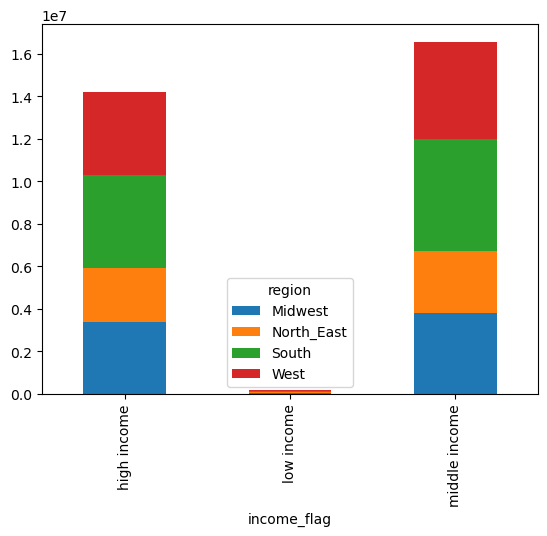

In [59]:
# Bar Chart for income and region
income_region_bar = income_region.plot(kind= 'bar', stacked = True)

In [60]:
# Exporting income_region bar chart
income_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_region_bar.png'))

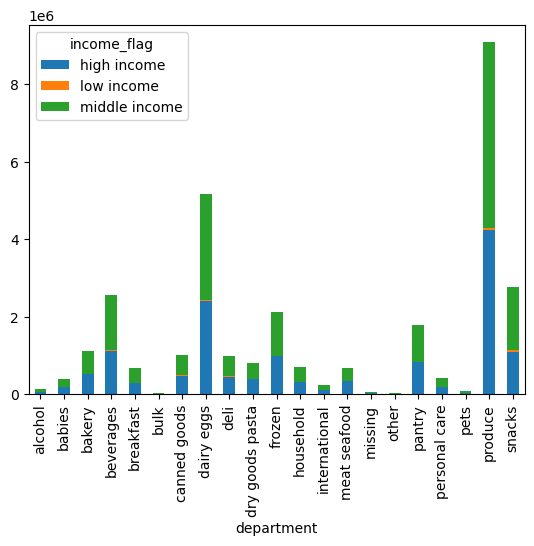

In [61]:
# Bar Chart for income and department
income_department_bar = income_department.plot(kind= 'bar', stacked = True)

In [62]:
# Exporting income_department bar chart
income_department_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_department_bar.png'))

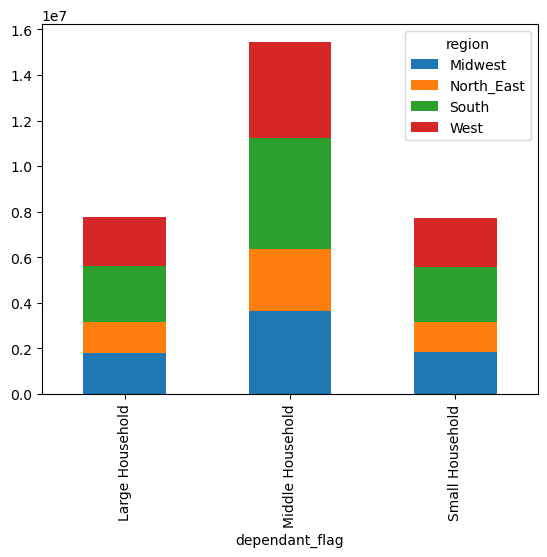

In [63]:
# Bar Chart for household and region
household_region_bar = household_region.plot(kind= 'bar', stacked = True)

In [64]:
# Exporting household_region bar chart
household_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'household_region_bar.png'))

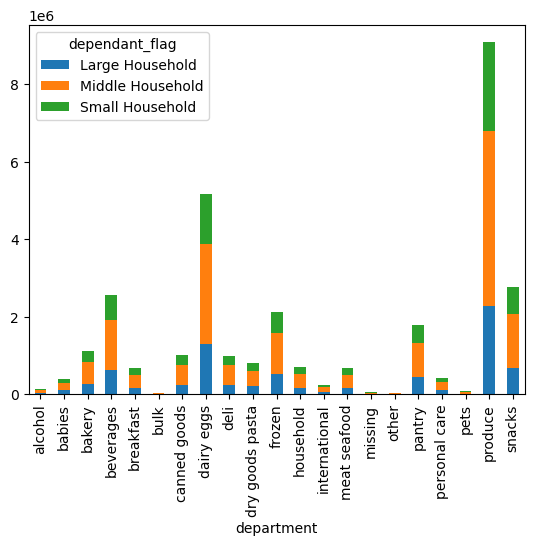

In [65]:
# Bar Chart for household and department
household_department_bar = household_department.plot(kind= 'bar', stacked = True)

In [66]:
# Exporting household_department bar chart
household_department_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'household_department_bar.png'))

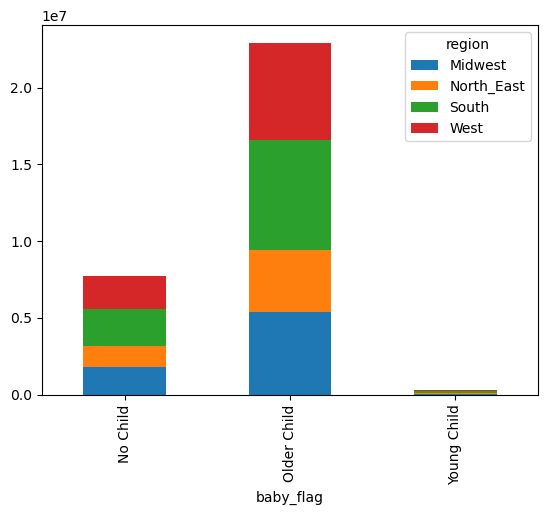

In [68]:
# Bar Chart for children and region
child_region_bar = child_region.plot(kind= 'bar', stacked = True)

In [69]:
# Exporting children_region bar chart
child_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'child_region_bar.png'))

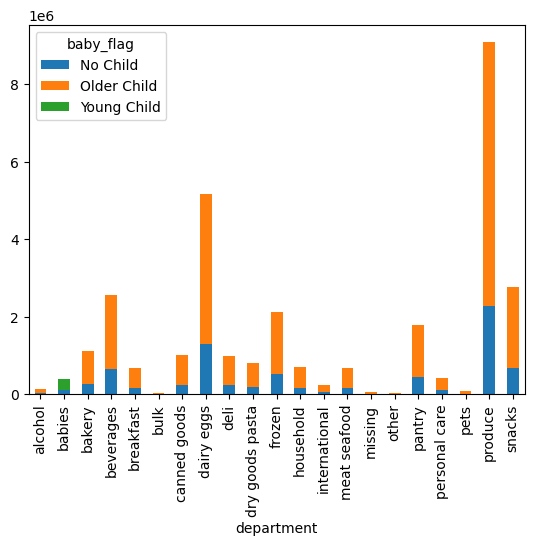

In [70]:
# Bar Chart for children and department
child_department_bar = child_department.plot(kind= 'bar', stacked = True)

In [71]:
# Exporting children_department bar chart
child_department_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'child_department_bar.png'))

## Question 10

In [72]:
# Exporting Dataset
regular_activity_sub.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_final_pkl'))